### Obteniendo matriz de confusión

La matriz de confusión muestra por filas(o columnas) que indican el valor real, como esta prediciendo nuestro modelo que se organiza por columnas(o filas).

In [37]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [38]:
cancer = load_breast_cancer()

train_set, test_set, train_labels, test_labels, = train_test_split(cancer.data,   # datos
                                                                   cancer.target, # y 
                                                                   test_size = 0.25, # 75% datos para trainning
                                                                   random_state = 1, # semilla
                                                                   stratify = cancer.target) # random por labels

x = train_set[:,0:30] # los datos de entrenamiento
y = train_labels # los targets de entrenamiento

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=2000)
log_reg.fit(X=x,
            y=y)

preds = log_reg.predict(X=test_set)

In [39]:
pd.crosstab(preds, test_labels,colnames=["real"],rownames=["prediccion"])

real         0   1
prediccion        
0           48   3
1            5  87

# En base a la siguiente figura:
![](matrizconfusion.png)

* TruePositive (TP): El modelo puso como positivos a los que verdaderamente son positivos.
* TrueNegative (TN): El modelo colocó como negativos a los que verdaderamente eran negativos.
* FalsePositive (FP): El modelo designó como positivos a los que eran en realidad negativos.
* FalseNegative (FN): El modelo predijo como negativo a los que en realidad eran positivos.

In [13]:
# También podemos usar la librería sklearn
from sklearn import metrics
print(metrics.confusion_matrix(y_true = test_labels,
                               y_pred = preds))

[[48  5]
 [ 3 87]]


### Calculando: Accuracy, Recall, Precision, y otras métricas.

Como ya tenemos claro las partes de una matriz de confusión, podemos usar estos valores para calcular las siguientes métricas:

* Accuracy: Se define como la suma de la correcta predicción entre el total de predicciónes.
                        (TP/TN)/(TP+TN+FP+FN)

* Esta última métrica tiene su defecto puesto que en el caso que tengamos un conjunto de 1000 datos y solo 3 defectuosos, podemos usar un algoritmo en el que tan solo con poner que todos salen bien el error tan solo sería de 3/1000 algo bastante bien (en teoría) pero si cambiamos de 3 defectuosos a 500 el error ahora sera 500/100. Entonces se puede afirmar que la precisión funciona bien con puntos de datos distribuidos uniformemente.

![](accuracy.png)

* Precisión: Se define como TP / (TP+FP) que indica el número de predicciones positivas. La cantidad de los que  positivos de la predicción respecto de todos los positivos obtenidos por el modelo.

![](precision.png)

* Recall (También conocido como el ratio de verdaderos positivos(TPR en inglés)): Se define como 
            TP / (TP + FN).
          que indica el número correcto de porcentaje de positivos en el dataset, no del modelo.
          
![](recall.png)

* F1 score: Esta métrica se define como $2*(precision*recall)/ (precission + recall)$. Este también es conocido como la media harmónica de precisión y recall y es una buena forma de resumir la evaluación del algoritmo en un simple número.

* False Positive Rate (FPR): Esta métrica es definida por FP / ( FP + TN) y corresponde a la cantidad de falsos negativos existen por total de negativos dados por el sistema (no del modelo). Este número indica que cuantos más numeros negativos se tenga se clasificará más erroneamente.

Consideramos el siguiente escenario: En la detección de cáncer de mama, un tumor maligno representará un valor negativo mientras que un tumor benigno representará un valor positivo, luego:

* Si precision o recall es alto significa que más pacientes con cancer benigno serán diagnosticados correctamente y en consecuencia el algoritmo funciona bien.

* Si precision es baja significa que más pacientes con tumores malignos serán detectados como benignos.

* Si recall es bajo significa que más pacientes con tumores benignos serán detectados como malignos.

Con respecto a los últimos dos puntos tener una precisión más baja es mucho más peligroso que tener un recall más bajo ya que hace que el paciente se confie y que no lleve el correcto tratamiento. Por lo tanto en, al menos, diagnosticos de cancer se tiene que hacer un seguimiento de estos valores (precision y recall) para asegurarnos del impacto que tiene nuestro modelo.

Para obtener accuracy del modelo podemos usar score().


In [14]:
print("-------Accuracy--------")
print(log_reg.score(X = test_set, 
                    y = test_labels))

-------Accuracy--------
0.9440559440559441


Para obtener otras métricas como "recall" o "F1-score" podemos usar report()

In [15]:
print("-------Metrics-------")
print(metrics.classification_report(y_true = test_labels,
                                    y_pred = preds))

-------Metrics-------
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## Curva ROC

Del inglés **Receiver Operating Caracterisitic (ROC)**,con tantas métricas disponibles, ¿cuál es una manera fácil de examinar la efectividad de un algoritmo? Una forma sería trazar una curva conocida como Receptor
Curva característica de funcionamiento (ROC). La curva ROC se crea trazando el
TPR contra el FPR en varias configuraciones de umbral.

¿Entonces, cómo funciona? Veamos un ejemplo simple. Usando el modelo que hemos estado trabajando, hemos derivado la matriz de confusión basado en el umbral predeterminado de 0.5 (lo que significa que todas esas probabilidades pronosticadas menores o iguales a 0.5 pertenecen a una clase, mientras que las mayores a 0.5 pertenecer a otra clase). Usando esta matriz de confusión, encontrará recall, precision, y posteriormente FPR y TPR. Una vez que se encuentran el FPR y el TPR, puede trazar el punto en el gráfico, como se muestra aqui:

![](roc05.png)


Luego generamos la matriz de confusión para un umbral de 0 y recalculamos recall, precision, FPR y TPR.
Usando los nuevos FPR y TPR, trazamos otro punto en el gráfico. Luego repetimos este proceso para umbrales de 0.1,
0.2, 0.3, y así sucesivamente, hasta 1.0.

En el umbral 0, para que un tumor se clasifique como benigno (1), la probabilidad debe ser mayor que 0. Por lo tanto, todas las predicciones se clasificarían como benignas (1). Aqui un gráfico explicando lo que se acaba de decir:

![](roc00.png)


En el umbral 1.0, para que un tumor se clasifique como benigno (1), la probabilidad debe ser igual a exactamente 1. Por lo tanto, todas las predicciones serían clasificado como maligno (0).

![](roc10.png)



En total los resultados aqui:

![](rocvarios.png)

Luego calculamos las métricas para los otros valores de umbral. Calculador todas las métricas basadas en diferentes valores de umbral es un proceso muy tedioso. Afortunadamente, Scikit-learn tiene la función roc_curve(), que calculará el FPR y el TPR automáticamente para usted según las etiquetas de prueba suministradas y probabilidades pronosticadas:

In [16]:
from sklearn.metrics import roc_curve, auc

In [40]:
#--- Encontramos la probabilidades de prediccion usando el set test
probs = log_reg.predict_proba(test_set)
preds = probs[:,1]

In [41]:
fpr, tpr, threshold = roc_curve(test_labels,preds)

print(fpr)
print()
print(tpr)
print()
print(threshold)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.09433962
 0.09433962 0.13207547 0.13207547 1.        ]

[0.         0.01111111 0.91111111 0.91111111 0.92222222 0.92222222
 0.93333333 0.93333333 0.94444444 0.94444444 0.95555556 0.95555556
 0.96666667 0.96666667 1.         1.        ]

[1.99999993e+00 9.99999933e-01 9.18926310e-01 9.07730166e-01
 8.83292048e-01 8.71338385e-01 8.06872436e-01 8.03062075e-01
 7.89502752e-01 7.78980904e-01 7.35520134e-01 7.05569101e-01
 5.83764799e-01 4.45796662e-01 8.15309973e-02 4.37990541e-16]


El treshold comienza en 2.0 y va bajando hasta un valor cercano a 0 (e-16)

### Graficando la curva ROC y hallando el área bajo la curva (AUC en inglés)

Podemos usar la función auc() para encontrar el área bajo el ROC:

In [42]:
roc_auc = auc(fpr, tpr)

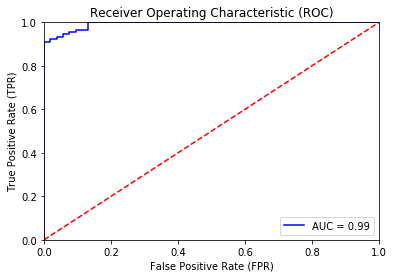

In [44]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

El área bajo una curva ROC es una medida de la utilidad de una prueba en general, donde un área mayor significa una prueba más útil y las áreas bajo curvas ROC se usan para comparar la utilidad de las pruebas. En general, busquemos al algoritmo con el AUC más alto.

In [46]:
roc_auc # cercano a 1

0.9924528301886792

## Resumen

En este capítulo, se aprendió sobre otro aprendizaje automático supervisado algoritmo: regresión logística. Primero aprendimos sobre la función logit y cómo transformarlo en una función sigmoidea. Luego aplicó la regresión logística al conjunto de datos de cáncer de mama y la usó para predecir si un tumor es maligno o benigno Más importante aún, este capítulo discutió algunas de las métricas que son útiles para determinar la efectividad de un algoritmo de aprendizaje automático. Además, aprendió sobre qué es una curva ROC, cómo trazarla y cómo
para calcular el área debajo de la curva.